Splits 60-40 :
Accuracy :  0.7935711726467728
Recall :  0.307560871422469
Precision :  0.6454504706409682


Splits 70-30 :
Accuracy :  0.794035351122637
Recall :  0.314367816091954
Precision :  0.6338354577056778


Splits 80-20 :
Accuracy :  0.7919950864981062
Recall :  0.2935196950444727
Precision :  0.6556291390728477




c:\users\harsh\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


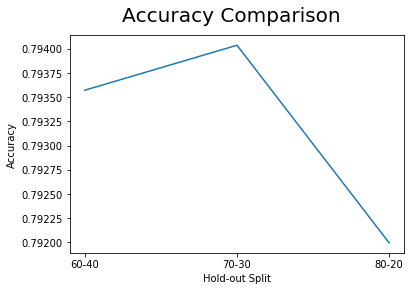

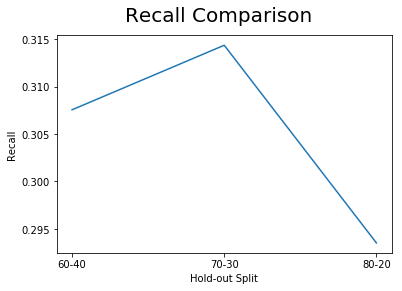

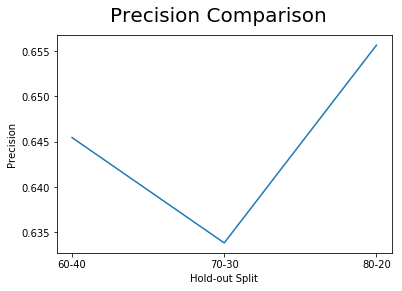

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB

def loadTrainData(trainData_name):
    trainData = pd.read_csv(trainData_name,names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
    return trainData
    
def loadTestData(testData_name):
    testData = pd.read_csv(testData_name,names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','label'])
    return testData

def naiveBayes_Compute(totalData, label, tSize):
    totalData_binary = pd.get_dummies(totalData)
    x_train, x_test, y_train, y_test = train_test_split(totalData_binary,label,test_size=tSize)
    GNB = GaussianNB()
    GNB.fit(x_train,y_train)
    predicted_values = GNB.predict(x_test)
    #print(predicted_values)
    #print(confusion_matrix(y_test, predicted_values))
    tn, fp, fn, tp = confusion_matrix(y_test, predicted_values).ravel()
    #print(tn, fp, fn, tp)
    #print(accuracy_score(y_test, predicted_values))
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
    return accuracy,recall,precision
    
def main():
    trainData_name = 'E:\\NJIT\\Sem 1 - Fall\'18\\CS634 - Data Mining\\Project\\Data Files\\adult.data'
    testData_name = 'E:\\NJIT\\Sem 1 - Fall\'18\\CS634 - Data Mining\\Project\\Data Files\\adult.test'
    dataFrame_train = loadTrainData(trainData_name)
    dataFrame_test = loadTestData(testData_name)
    totalData = dataFrame_train.append(dataFrame_test)
    label = dataFrame_train['label'].append(dataFrame_test['label'])
    #print(totalData.head())
    #print(label.head())
    
    #Splits
    #60-40
    print("Splits 60-40 :")
    tSize = 0.4
    accuracy1, recall1, precision1 = naiveBayes_Compute(totalData, label, tSize)
    print("Accuracy : ",accuracy1)
    print("Recall : ",recall1)
    print("Precision : ",precision1)
    print("\n")
    
    #70-30
    print("Splits 70-30 :")
    tSize = 0.3
    accuracy2, recall2, precision2 = naiveBayes_Compute(totalData, label, tSize)
    print("Accuracy : ",accuracy2)
    print("Recall : ",recall2)
    print("Precision : ",precision2)
    print("\n")
    
    #60-20
    print("Splits 80-20 :")
    tSize = 0.2
    accuracy3, recall3, precision3 = naiveBayes_Compute(totalData, label, tSize)
    print("Accuracy : ",accuracy3)
    print("Recall : ",recall3)
    print("Precision : ",precision3)
    print("\n")
    
    y_acc = [accuracy1,accuracy2,accuracy3]
    y_rec = [recall1,recall2,recall3]
    y_pre = [precision1,precision2,precision3]
    x = ['60-40','70-30','80-20']
    
    fig_1 = plt.figure(1)
    fig_1.suptitle('Accuracy Comparison', fontsize=20)
    plt.plot(x,y_acc)
    plt.xlabel('Hold-out Split')
    plt.ylabel('Accuracy')
    fig_1.show()
    
    fig_2 = plt.figure(2)
    fig_2.suptitle('Recall Comparison', fontsize=20)
    plt.plot(x,y_rec)
    plt.xlabel('Hold-out Split')
    plt.ylabel('Recall')
    fig_2.show()
    
    fig_3 = plt.figure(3)
    fig_3.suptitle('Precision Comparison', fontsize=20)
    plt.plot(x,y_pre)
    plt.xlabel('Hold-out Split')
    plt.ylabel('Precision')
    fig_3.show()
    
main()